<a href="https://colab.research.google.com/github/Doldolee/TF2.0/blob/main/basic_ML2DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

hs = W*x_data + b

cost = tf.reduce_mean(tf.square(hs - y_data))



#### Gradient descent
minimize cost(W,b)

A.assign_sub(B)

A -=B

In [ ]:
import numpy as np
# gradient값을 얼마나 반영시킬 것인지를 결정
learning_rate = 0.01 

for i in range(100):
  with tf.GradientTape() as tape:
    hs = W*x_data + b
    cost=tf.reduce_mean(tf.square(hs-y_data))

  W_grad , b_grad = tape.gradient(cost, [W,b])

  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)
  if i % 10 ==0:
    print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))




    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


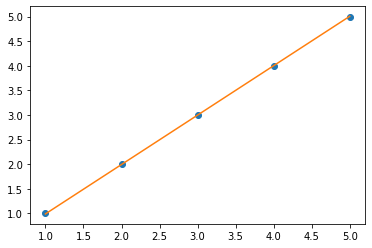

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data ,"o")
plt.plot(x_data, hs.numpy())

In [ ]:
print(W.numpy())

1.0048164


cost 함수

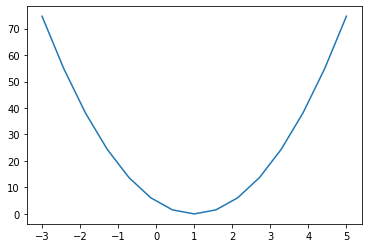

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x=np.array([1,2,3])
y=np.array([1,2,3])

def cost_func(w, x,y):

  return tf.reduce_mean(tf.square(w*x-y))

cost_values = []
for i in np.linspace(-3,5,num=15):
  curr_cost = cost_func(i,x,y)
  cost_values.append(curr_cost)

plt.plot(np.linspace(-3,5,num=15), cost_values)

Gradient descent

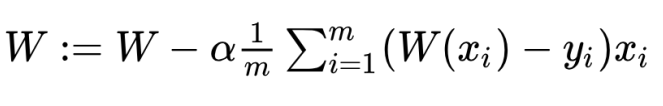

In [ ]:
w=tf.Variable(tf.random.normal((1,), -100.,100.))
print(w)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-129.26414], dtype=float32)>


In [ ]:
alpha = 0.01
gradient = tf.reduce_mean(tf.multiply(tf.multiply(w,x)-y,x))
descent = w - tf.multiply(alpha, gradient)
w.assign(descent)

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([-123.18515], dtype=float32)>

In [ ]:
for step in range(100):
  cost = tf.reduce_mean(tf.square(w*x-y))

  gradient = tf.reduce_mean(tf.multiply(tf.multiply(w,x)-y,x))
  descent = w - tf.multiply(alpha, gradient)
  w.assign(descent)
  if step%10==0:
    print(step, cost.numpy())

0 5.082785
10 1.9543276
20 0.7514375
30 0.28892717
40 0.11109217
50 0.042714864
60 0.016423812
70 0.006314957
80 0.002428111
90 0.00093360356


multi feature linear regression

In [ ]:
learning_rate=0.001
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

w1 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
w2 = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))
b = tf.Variable(tf.random.uniform((1,), -10.0, 10.0))

for i in range(100):
  with tf.GradientTape() as tape:
    hs = w1*x1_data + w2*x2_data + b
    cost = tf.reduce_mean(tf.square(hs-y_data))
  w1_grad, w2_grad, b_grad = tape.gradient(cost, [w1,w2,b])
  w1.assign_sub(learning_rate * w1_grad)
  w2.assign_sub(learning_rate * w2_grad)
  b.assign_sub(learning_rate * b_grad)

  if i% 50==0:
    print(i, cost.numpy())

0 876.92413
50 283.01013


In [ ]:
tf.random.set_seed(0) 
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

x = data[:, :-1]
y = data[:,[-1]]

w = tf.Variable(tf.random.normal((3,1)))
b = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

def predict(x):
  return tf.matmul(x,w) + b

for i in range(2000):
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(x)-y)))
  w_grad, b_grad = tape.gradient(cost, [w,b])

  w.assign_sub(learning_rate * w_grad)
  b.assign_sub(learning_rate * b_grad)

  if i%100==0:
    print(i, cost.numpy())

0 1798.2893
100 2.2888284
200 2.063193
300 2.0586975
400 2.0542264
500 2.0497966
600 2.045343
700 2.0409389
800 2.03655
900 2.0322158
1000 2.0278895
1100 2.0236201
1200 2.0193684
1300 2.0150952
1400 2.0108483
1500 2.0066197
1600 2.0024133
1700 1.9982364
1800 1.9940227
1900 1.9898555


logistic regression

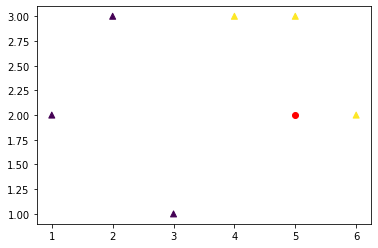

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_train = [[1.,2.],[2.,3.],[3.,1.],[4.,3.],[5.,3.],[6.,2.]]
y_train = [[0.],[0.],[0.],[1.],[1.],[1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c = colors, marker="^")

plt.scatter(x_test[0][0], x_test[0][1], c="red")




In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
print(dataset)

<TensorSliceDataset shapes: ((2,), (1,)), types: (tf.float32, tf.float32)>


In [ ]:
w = tf.Variable(tf.zeros((2,1)), name='weight')
b = tf.Variable(tf.zeros((1,)), name="bias")

def logistic_regression(features):
  hs = tf.divide(1.,1. + tf.exp(-tf.matmul(features, w) + b))
  return hs

def loss_fn(hs, labels):
  cost = -tf.reduce_mean(labels * tf.math.log(hs) + (1-labels) * tf.math.log(1-hs))
  return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hs, labels):
  predicted = tf.cast(hs > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels),  dtype = tf.float32))
  return accuracy

def grad(features, labels):
  with tf.GradientTape() as tape:
    hs = logistic_regression(features)
    loss_values = loss_fn(hs, labels)
  return tape.gradient(loss_values, [w,b])

for i in range(1001):
  for features, labels in iter(dataset.batch(len(x_train))):
    hs = logistic_regression(features)
    grads = grad(features, labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [w,b]))
    if i % 100 ==0:
      print( i, loss_fn(hs, labels))



  

0 tf.Tensor(0.6931472, shape=(), dtype=float32)
100 tf.Tensor(0.5780855, shape=(), dtype=float32)
200 tf.Tensor(0.53520733, shape=(), dtype=float32)
300 tf.Tensor(0.50564724, shape=(), dtype=float32)
400 tf.Tensor(0.4840239, shape=(), dtype=float32)
500 tf.Tensor(0.46728837, shape=(), dtype=float32)
600 tf.Tensor(0.45367432, shape=(), dtype=float32)
700 tf.Tensor(0.44212702, shape=(), dtype=float32)
800 tf.Tensor(0.43199757, shape=(), dtype=float32)
900 tf.Tensor(0.42287433, shape=(), dtype=float32)
1000 tf.Tensor(0.4144899, shape=(), dtype=float32)


softmax classifier

In [ ]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#convert into numpy and float format
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

In [ ]:
nb_classes = 3 #class의 개수입니다.

print(x_data.shape)
print(y_data.shape)

(8, 4)
(8, 3)


In [ ]:
class softmax_classifier(tf.keras.Model):
  def __init__(self, nb_classes):
    super(softmax_classifier, self).__init__()
    self.w = tf.Variable(tf.random.normal((4,nb_classes)), name='weight')
    self.b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')

  def softmax_regression(self, x):
    return tf.nn.softmax(tf.matmul(x,self.w)+self.b)
  def cost_fn(self, x,y):
    logits = self.softmax_regression(x)
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.math.log(logits), axis=1))
    return cost

  def grad_fn(self, x,y):
    with tf.GradientTape() as tape:
      cost = self.cost_fn(x_data, y_data)
    return tape.gradient(cost, self.variables)

  def fit(self, x,y, epochs=2000, verbose=500):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
      grads = self.grad_fn(x,y)
      optimizer.apply_gradients(zip(grads, self.variables))
      if (i==0) | ((i+1)%verbose==0):
        print(i+1, self.cost_fn(x,y))

model = softmax_classifier(nb_classes)
model.fit(x_data, y_data)

1 tf.Tensor(1.8885454, shape=(), dtype=float32)
500 tf.Tensor(0.4410292, shape=(), dtype=float32)
1000 tf.Tensor(0.23945999, shape=(), dtype=float32)
1500 tf.Tensor(0.18921222, shape=(), dtype=float32)
2000 tf.Tensor(0.1560109, shape=(), dtype=float32)


RNN

In [ ]:
import numpy as np
import tensorflow as tf

h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
o = [0,0,0,1]

#### input이 단어 'h' 한개 일 때

In [ ]:
x_data = np.array([[h]], dtype=np.float32)
#RNN의 input은 (batch, sequence_length, input_dimension)으로 입력되어야한다.
print(x_data.shape)

(1, 1, 4)


In [ ]:
hidden_size = 2
cell = tf.keras.layers.SimpleRNNCell(units=hidden_size)
rnn = tf.keras.layers.RNN(cell, return_sequences=True, return_state=True)
# outputs이 hidden layer의 결과고 states는 마지막 hidden layer의 output이다.
outputs, states = rnn(x_data)

# 1개의 input만 입력되었기 때문에 outputs와 states가 동일하다. 
print(x_data, x_data.shape)
print(outputs, outputs.shape)
print(states, states.shape)

[[[1. 0. 0. 0.]]] (1, 1, 4)
tf.Tensor([[[-0.29737744 -0.19311395]]], shape=(1, 1, 2), dtype=float32) (1, 1, 2)
tf.Tensor([[-0.29737744 -0.19311395]], shape=(1, 2), dtype=float32) (1, 2)


#### input이 단어 hello 일 때

In [ ]:
x_data = np.array([[h,e,l,l,o]], dtype=np.float32)
print(x_data.shape)

(1, 5, 4)


In [ ]:
hidden_size = 2
rnn = tf.keras.layers.SimpleRNN(units=2, return_sequences=True, return_state = True)
outputs, states = rnn(x_data)

#outputs는 모든 hidden cell의 output을 보여주므로 states는 outputs의 마지막 벡터와 값이 동일하다. 
print(x_data, x_data.shape)
print(outputs, outputs.shape)
print(states, states.shape)


[[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]] (1, 5, 4)
tf.Tensor(
[[[-0.7329436  -0.68579066]
  [-0.5497672   0.907627  ]
  [ 0.698694    0.696796  ]
  [ 0.5870644  -0.37180504]
  [ 0.00493922 -0.58213645]]], shape=(1, 5, 2), dtype=float32) (1, 5, 2)
tf.Tensor([[ 0.00493922 -0.58213645]], shape=(1, 2), dtype=float32) (1, 2)


#### input이 여러개의 단어 일 때

In [ ]:
x_data = np.array([[h,e,l,l,o],[e,o,l,l,l],[l,l,e,e,l]], dtype=np.float32)

hidden_size = 2
rnn = tf.keras.layers.SimpleRNN(units=2, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print(x_data, x_data.shape)
print(outputs, outputs.shape)
print(states, states.shape)



[[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]] (3, 5, 4)
tf.Tensor(
[[[ 0.36934242 -0.76016134]
  [-0.54908    -0.08204686]
  [ 0.8251146  -0.41589382]
  [ 0.1910082  -0.8982295 ]
  [-0.9435516  -0.13493468]]

 [[ 0.22198638 -0.14394787]
  [-0.8120224  -0.49421537]
  [ 0.73907834 -0.00825011]
  [ 0.5292089  -0.9206789 ]
  [-0.09403071 -0.7413489 ]]

 [[ 0.7476548  -0.7436746 ]
  [-0.05102217 -0.84295   ]
  [-0.4441389   0.312033  ]
  [ 0.6161152   0.08201732]
  [ 0.6223813  -0.91085565]]], shape=(3, 5, 2), dtype=float32) (3, 5, 2)
tf.Tensor(
[[-0.9435516  -0.13493468]
 [-0.09403071 -0.7413489 ]
 [ 0.6223813  -0.91085565]], shape=(3, 2), dtype=float32) (3, 2)


#### many to one

In [ ]:
import tensorflow as tf
import numpy as np

words = ['good','bad','worse','so good']
y_data = [1,0,0,1]

char_set = ['<pad'] + sorted(list(set("".join(words))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [ ]:

x_data = list(map(lambda word: [char2idx.get(char) for char in word], words))
x_data_len = list(map(lambda word: len(word), x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_sequences = 10

x_data = pad_sequences(sequences = x_data, maxlen = max_sequences, padding='post', truncating='post')

print(x_data)
print(x_data_len)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[4, 3, 5, 7]
[1, 0, 0, 1]


In [ ]:
print(len(char2idx))

11


In [ ]:

class RNNM(tf.keras.Model):
  def __init__(self, hidden_size, char2idx):
    super(RNNM, self).__init__()
    self.embedding =  tf.keras.layers.Embedding(11, 11, trainable=False, mask_zero = True, input_length=max_sequences, embeddings_initializer=tf.keras.initializers.Constant(np.eye(len(char2idx))))
    self.RNN1 = tf.keras.layers.SimpleRNN(hidden_size,return_sequences=True, return_state=True)
    self.dense1 = tf.keras.layers.Dense(2)

  def call(self, x):
    x = self.embedding(x)
    x, output = self.RNN1(x)
    x = self.dense1(output)
    return x
model = RNNM(10, char2idx)

In [ ]:

one_hot = np.eye(len(char2idx))

#embedding은 token을 one-hot vector로 표현함. mask_zero는 전처리단계에서 0값으로 패딛처리된 부분을 알아서 연산에서 제외함., trainable 옵션으로 one hot vector를 train하지 않을 수 있음.
#mask_zero 시에는 output_dim을 vocab의 길이로 맞춰주어야함.
embed = tf.keras.layers.Embedding(11, 11, trainable=False, mask_zero = True, input_length=max_sequences, embeddings_initializer=tf.keras.initializers.Constant(one_hot))
RNN = tf.keras.layers.SimpleRNN(hidden_size, return_sequences=True, return_state=True)
input = embed(x_data)
print(input.shape)
output, state = RNN(input)
print(output.shape)
print(state.shape)
dense = tf.keras.layers.Dense(2, activation='sigmoid')(state)
print(dense.shape)
print(dense)

model = tf.keras.Model(embed, dense)



In [ ]:
def loss_fn(model, x, y):
  return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=model(x), from_logits = True))

lr = 0.01
epochs=30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate=lr)


In [ ]:
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size = 4)
tr_dataset = tr_dataset.batch(batch_size = batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None,)), types: (tf.int32, tf.int32)>


In [ ]:
tr_loss_hist = []

for epoch in range(epochs):
  avg_tr_loss = 0
  tr_step = 0

  for x_mb, y_mb in tr_dataset:
    with tf.GradientTape() as tape:
      tr_loss = loss_fn(model, x=x_mb, y = y_mb)
    grads = tape.gradient(target=tr_loss, sources = model.variables)
    opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
    avg_tr_loss +=tr_loss
    tr_step +=1
  
  else:
    avg_tr_loss /= tr_step
    tr_loss_hist.append(avg_tr_loss)

  if (epoch+1) % 5 ==0:
    print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss.numpy()))


epoch :   5, tr_loss : 0.071
epoch :  10, tr_loss : 0.010
epoch :  15, tr_loss : 0.004
epoch :  20, tr_loss : 0.002
epoch :  25, tr_loss : 0.001
epoch :  30, tr_loss : 0.001


In [ ]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print(yhat)


[[-3.1710343  3.6251416]
 [ 3.671873  -2.805457 ]
 [ 3.484414  -3.9281816]
 [-3.033969   3.7172155]]


In [ ]:
yhat = np.argmax(yhat, axis=-1)
print(yhat)

[1 0 0 1]


In [ ]:
print('acc : {:.2%}'.format(np.mean(yhat == y_data)))

acc : 100.00%


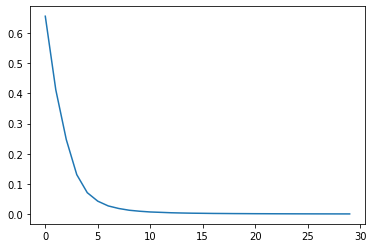

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tr_loss_hist)

#### stacked RNN
sentence classification

In [ ]:
# setup
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint
%matplotlib inline

print(tf.__version__)

2.7.0


In [ ]:
# example data
sentences = ['What I cannot create, I do not understand.',
             'Intellecuals solve problems, geniuses prevent them',
             'A person who never made a mistake never tied anything new.',
             'The same equations have the same solutions.']
y_data = [1,0,0,1] # 1: richard feynman, 0: albert einstein

In [ ]:
# creating a token dictionary
char_set = ['<pad>'] + sorted(list(set(''.join(sentences))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', ',', '.', 'A', 'I', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y']
{0: '<pad>', 1: ' ', 2: ',', 3: '.', 4: 'A', 5: 'I', 6: 'T', 7: 'W', 8: 'a', 9: 'b', 10: 'c', 11: 'd', 12: 'e', 13: 'g', 14: 'h', 15: 'i', 16: 'k', 17: 'l', 18: 'm', 19: 'n', 20: 'o', 21: 'p', 22: 'q', 23: 'r', 24: 's', 25: 't', 26: 'u', 27: 'v', 28: 'w', 29: 'y'}
{'<pad>': 0, ' ': 1, ',': 2, '.': 3, 'A': 4, 'I': 5, 'T': 6, 'W': 7, 'a': 8, 'b': 9, 'c': 10, 'd': 11, 'e': 12, 'g': 13, 'h': 14, 'i': 15, 'k': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'q': 22, 'r': 23, 's': 24, 't': 25, 'u': 26, 'v': 27, 'w': 28, 'y': 29}


In [ ]:
# converting sequence of tokens to sequence of indices
x_data = list(map(lambda sentence : [char2idx.get(char) for char in sentence], sentences))
x_data_len = list(map(lambda sentence : len(sentence), sentences))

print(x_data)
print(x_data_len)
print(y_data)

[[7, 14, 8, 25, 1, 5, 1, 10, 8, 19, 19, 20, 25, 1, 10, 23, 12, 8, 25, 12, 2, 1, 5, 1, 11, 20, 1, 19, 20, 25, 1, 26, 19, 11, 12, 23, 24, 25, 8, 19, 11, 3], [5, 19, 25, 12, 17, 17, 12, 10, 26, 8, 17, 24, 1, 24, 20, 17, 27, 12, 1, 21, 23, 20, 9, 17, 12, 18, 24, 2, 1, 13, 12, 19, 15, 26, 24, 12, 24, 1, 21, 23, 12, 27, 12, 19, 25, 1, 25, 14, 12, 18], [4, 1, 21, 12, 23, 24, 20, 19, 1, 28, 14, 20, 1, 19, 12, 27, 12, 23, 1, 18, 8, 11, 12, 1, 8, 1, 18, 15, 24, 25, 8, 16, 12, 1, 19, 12, 27, 12, 23, 1, 25, 15, 12, 11, 1, 8, 19, 29, 25, 14, 15, 19, 13, 1, 19, 12, 28, 3], [6, 14, 12, 1, 24, 8, 18, 12, 1, 12, 22, 26, 8, 25, 15, 20, 19, 24, 1, 14, 8, 27, 12, 1, 25, 14, 12, 1, 24, 8, 18, 12, 1, 24, 20, 17, 26, 25, 15, 20, 19, 24, 3]]
[42, 50, 58, 43]
[1, 0, 0, 1]


In [ ]:
# padding the sequence of indices
max_sequence = 55
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                       padding = 'post', truncating = 'post')

# checking data
print(x_data)
print(x_data_len)
print(y_data)

[[ 7 14  8 25  1  5  1 10  8 19 19 20 25  1 10 23 12  8 25 12  2  1  5  1
  11 20  1 19 20 25  1 26 19 11 12 23 24 25  8 19 11  3  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 5 19 25 12 17 17 12 10 26  8 17 24  1 24 20 17 27 12  1 21 23 20  9 17
  12 18 24  2  1 13 12 19 15 26 24 12 24  1 21 23 12 27 12 19 25  1 25 14
  12 18  0  0  0  0  0]
 [ 4  1 21 12 23 24 20 19  1 28 14 20  1 19 12 27 12 23  1 18  8 11 12  1
   8  1 18 15 24 25  8 16 12  1 19 12 27 12 23  1 25 15 12 11  1  8 19 29
  25 14 15 19 13  1 19]
 [ 6 14 12  1 24  8 18 12  1 12 22 26  8 25 15 20 19 24  1 14  8 27 12  1
  25 14 12  1 24  8 18 12  1 24 20 17 26 25 15 20 19 24  3  0  0  0  0  0
   0  0  0  0  0  0  0]]
[42, 50, 58, 43]
[1, 0, 0, 1]


In [ ]:
for x_mb, y_mb in tr_dataset:
  x = tf.keras.layers.Embedding(30, 30, trainable=False, mask_zero = True, input_length=max_sequence, embeddings_initializer=tf.keras.initializers.Constant(one_hot))(x_mb)
  x = tf.keras.layers.SimpleRNN(10, return_sequences=True)(x)
  x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2))(x)
  x = tf.keras.layers.SimpleRNN(10)(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(2)(x)
  print(x.shape)
  

(2, 2)
(2, 2)


In [ ]:
num_classes = 2
hidden_dims = [10,10]

input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))

class MRNN1(tf.keras.Model):
  def __init__(self, char2idx):
    super(MRNN1, self).__init__()
    self.embedding = tf.keras.layers.Embedding(30, 30, trainable=False, mask_zero = True, input_length=max_sequence, embeddings_initializer=tf.keras.initializers.Constant(np.eye(len(char2idx))))
    self.RNN1 = tf.keras.layers.SimpleRNN(10, return_sequences=True)
    self.drop1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2))
    self.RNN2 = tf.keras.layers.SimpleRNN(10)
    self.drop2 = tf.keras.layers.Dropout(0.2)
    self.dense1 = tf.keras.layers.Dense(2)

  def call(self, x):
    x = self.embedding(x)
    x = self.RNN1(x)
    x = self.drop1(x)
    x = self.RNN2(x)
    x = self.drop2(x)
    x = self.dense1(x)
    return x

model = MRNN1(char2idx)

In [ ]:
def loss_fn(model, x,y,training):
  return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred = model(x), from_logits=True))

lr = .01
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)

In [ ]:
# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size=batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 55), (None,)), types: (tf.int32, tf.int32)>


In [ ]:
# training
tr_loss_hist = []

for epoch in range(epochs):
  avg_tr_loss = 0
  tr_step=0
  for x_mb, y_mb in tr_dataset:
    with tf.GradientTape() as tape:
      tr_loss = loss_fn(model, x=x_mb, y=y_mb, training=True)
    grads = tape.gradient(target=tr_loss, sources = model.variables)
    opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
    avg_tr_loss +=tr_loss
    tr_step +=1
  else:
    avg_tr_loss /=tr_step
    tr_loss_hist.append(avg_tr_loss)
  if (epoch + 1) % 5 ==0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss.numpy()))

epoch :   5, tr_loss : 0.000
epoch :  10, tr_loss : 0.000
epoch :  15, tr_loss : 0.000
epoch :  20, tr_loss : 0.000
epoch :  25, tr_loss : 0.000
epoch :  30, tr_loss : 0.000


In [ ]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('accuracy : {:.2%}'.format(np.mean(yhat == y_data)))

accuracy : 100.00%


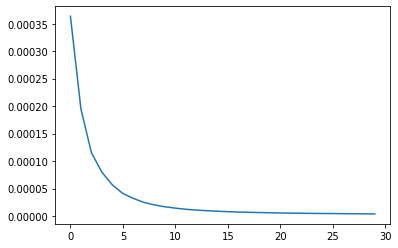

In [ ]:
plt.plot(tr_loss_hist)

#### many to many
ex)
part of speech tagging


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint
%matplotlib inline

print(tf.__version__)

2.7.0


In [ ]:
sentences = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
     ['noun', 'verb', 'adverb', 'adjective'],
     ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
     ['noun', 'verb', 'adverb', 'adjective', 'verb']]

In [ ]:
# creating a token dictionary for word
word_list = sum(sentences, [])
word_list = sorted(set(word_list))
word_list = ['<pad>'] + word_list
word2idx = {word : idx for idx, word in enumerate(word_list)}
idx2word = {idx : word for idx, word in enumerate(word_list)}

print(word2idx)
print(idx2word)
print(len(idx2word))

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
15


In [ ]:
pos_list = sum(pos, [])
pos_list = sorted(set(pos_list))
pos_list = ['<pad>'] + pos_list
pos2idx = {pos : idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx : pos for idx, pos in enumerate(pos_list)}

print(pos2idx)
print(idx2pos)
print(len(pos2idx))

{'<pad>': 0, 'adjective': 1, 'adverb': 2, 'determiner': 3, 'noun': 4, 'preposition': 5, 'pronoun': 6, 'verb': 7}
{0: '<pad>', 1: 'adjective', 2: 'adverb', 3: 'determiner', 4: 'noun', 5: 'preposition', 6: 'pronoun', 7: 'verb'}
8


In [ ]:
# converting sequence of tokens to sequence of indices
max_sequence = 10
x_data = list(map(lambda sentence : [word2idx.get(token) for token in sentence], sentences))
y_data = list(map(lambda sentence : [pos2idx.get(token) for token in sentence], pos))

# padding the sequence of indices
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence, padding='post')
x_data_mask = ((x_data != 0) * 1).astype(np.float32)
x_data_len = list(map(lambda sentence : len(sentence), sentences))

y_data = pad_sequences(sequences = y_data, maxlen = max_sequence, padding='post')

# checking data
print(x_data, x_data_len)
print(x_data_mask)
print(y_data)

[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]] [3, 4, 7, 5]
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]


In [ ]:
print(x_data.shape)
print(y_data.shape)

(4, 10)
(4, 10)


In [ ]:
num_classes = len(pos2idx)
hidden_dim = 10

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim, mask_zero=True,
                           trainable=False, input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units=hidden_dim, return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(units=num_classes)))

In [ ]:
y=y_data
x = x_data
x_len = x_data_len
mask = tf.math.logical_not(tf.math.equal(y,0))
print(mask)
print(x_len)

tf.Tensor(
[[ True  True  True False False False False False False False]
 [ True  True  True  True False False False False False False]
 [ True  True  True  True  True  True  True False False False]
 [ True  True  True  True  True False False False False False]], shape=(4, 10), dtype=bool)
[3, 4, 7, 5]


In [ ]:
x = tf.keras.layers.Embedding(15,15,mask_zero=True, trainable=False)(x)
print(x.shape)
x = tf.keras.layers.SimpleRNN(10, return_sequences=True)(x)
print(x.shape)
x = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(8))(x)
print(x.shape)

(4, 10, 15)
(4, 10, 10)
(4, 10, 8)


In [ ]:
masking = tf.sequence_mask(x_len, maxlen=max_sequence, dtype=tf.float32)
print(masking)
valid_time_step = tf.cast(x_len,dtype=tf.float32)  
print(valid_time_step)
sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=x, from_logits=True) * masking
print(sequence_loss)
sequence_loss = tf.reduce_sum(sequence_loss, axis=-1) / valid_time_step
print(sequence_loss)
sequence_loss = tf.reduce_mean(sequence_loss)   
print(sequence_loss)

tf.Tensor(
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]], shape=(4, 10), dtype=float32)
tf.Tensor([3. 4. 7. 5.], shape=(4,), dtype=float32)
tf.Tensor(
[[2.0642595 2.0189373 2.0714786 0.        0.        0.        0.
  0.        0.        0.       ]
 [2.0670097 2.0860069 2.0984862 2.1167724 0.        0.        0.
  0.        0.        0.       ]
 [2.0670097 2.0860069 2.0431268 2.0229917 2.0060794 2.1613464 2.1207635
  0.        0.        0.       ]
 [2.0670097 2.0860069 2.0984862 2.1252062 2.1109402 0.        0.
  0.        0.        0.       ]], shape=(4, 10), dtype=float32)
tf.Tensor([2.0515585 2.0920687 2.072475  2.09753  ], shape=(4,), dtype=float32)
tf.Tensor(2.078408, shape=(), dtype=float32)


In [ ]:
from keras_preprocessing import sequence

mask = tf.math.logical_not(tf.math.equal(y,0))
mask = tf.cast(mask, dtype=tf.float32)
sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=x, from_logits=True) * mask
print(sequence_loss)
seq = tf.reduce_mean(sequence_loss, axis=-1)
print(seq)

tf.Tensor(
[[2.047162  2.050177  2.078169  0.        0.        0.        0.
  0.        0.        0.       ]
 [2.0873485 2.1472924 2.0571752 2.1049104 0.        0.        0.
  0.        0.        0.       ]
 [2.0873485 2.1472924 2.1580122 2.093558  2.0671055 2.0299263 2.0849862
  0.        0.        0.       ]
 [2.0873485 2.1472924 2.0571752 2.1352708 2.0861099 0.        0.
  0.        0.        0.       ]], shape=(4, 10), dtype=float32)
tf.Tensor([0.61755085 0.8396727  1.466823   1.0513197 ], shape=(4,), dtype=float32)


In [ ]:
# creating loss function
def loss_fn(model, x, y, x_len, max_sequence):
    masking = tf.sequence_mask(x_len, maxlen=max_sequence, dtype=tf.float32)
    valid_time_step = tf.cast(x_len,dtype=tf.float32)    
    sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x), from_logits=True) * masking    
    sequence_loss = tf.reduce_sum(sequence_loss, axis=-1) / valid_time_step    
    sequence_loss = tf.reduce_mean(sequence_loss)    
    return sequence_loss

# creating and optimizer
lr = 0.1
epochs = 30
batch_size = 2 
opt = tf.keras.optimizers.Adam(learning_rate = lr)

In [ ]:
# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data, x_data_len))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size = 2)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None, 10), (None,)), types: (tf.int32, tf.int32, tf.int32)>


In [ ]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb, x_mb_len in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, x_len=x_mb_len, max_sequence=max_sequence)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss))

epoch :   5, tr_loss : 0.067
epoch :  10, tr_loss : 0.004
epoch :  15, tr_loss : 0.001
epoch :  20, tr_loss : 0.001
epoch :  25, tr_loss : 0.000
epoch :  30, tr_loss : 0.000


#### many to many bidirectional

In [ ]:
# Bidirectional 하는 부분만 다름.
num_classes = len(pos2idx)
hidden_dim = 10

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

model = Sequential()
model.add(layers.InputLayer(input_shape=(max_sequence,)))
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim, mask_zero=True,
                                 trainable=False, input_length=max_sequence,
                                 embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.Bidirectional(keras.layers.SimpleRNN(units=hidden_dim, return_sequences=True)))
model.add(layers.TimeDistributed(keras.layers.Dense(units=num_classes)))